Milene Carmes Vallejo
12/13/2022

# Import

In [48]:
# Install tmdbsimple (only need to run once)
!pip install tmdbsimple



  Using cached tmdbsimple-2.9.1-py3-none-any.whl (38 kB)


In [3]:
import pandas as pd
import numpy as np
import os, time,json
import tmdbsimple as tmdb 
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns


# Downloads the Files

In [2]:
basics_url = 'https://datasets.imdbws.com/title.basics.tsv.gz'
akas_url = 'https://datasets.imdbws.com/title.akas.tsv.gz'
ratings_url = 'https://datasets.imdbws.com/title.ratings.tsv.gz'

# Loading TSV's with Pandas

In [3]:
basics = pd.read_csv(basics_url, sep = '\t', low_memory = False)
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9461877,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9461878,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9461879,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9461880,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [4]:
akas = pd.read_csv(akas_url, sep = '\t', low_memory = False)
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
34251229,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
34251230,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
34251231,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
34251232,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [5]:
ratings = pd.read_csv(ratings_url, sep = '\t', low_memory = False)
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1929
1,tt0000002,5.8,261
2,tt0000003,6.5,1745
3,tt0000004,5.6,176
4,tt0000005,6.2,2559
...,...,...,...
1258675,tt9916690,7.4,6
1258676,tt9916720,5.4,287
1258677,tt9916730,8.0,8
1258678,tt9916766,6.7,21


# Required Preprocessing - Details


According to the data dictionary, null values have been encoding as \N.

You will want to find those and replace them with np.nan.

However, the backslash (\) character is a special one that tells the computer to ignore whatever character comes next.

So if we were to say df.replace({'\N':np.nan}), the computer would see \N as an empty string.

To fix this, add a second backslash character, which will tell the computer that you actually WANTED to use a literal \.

df.replace({'\\N':np.nan})


In [6]:
basics= basics.replace({'\\N':np.nan})
akas = akas.replace({'\\N':np.nan})
ratings =ratings.replace({'\\N':np.nan})

## Basics

In [7]:
# check duplicates
basics.duplicated().sum()

0

In [8]:
# Replace "\N" with np.nan
basics= basics.replace({'\\N':np.nan})

In [9]:
# check nan values
basics.isna().sum()

tconst                  0
titleType               0
primaryTitle           11
originalTitle          11
isAdult                 1
startYear         1266972
endYear           9361754
runtimeMinutes    6748869
genres             431846
dtype: int64

#### Eliminate movies that are null for runtimeMinutes and genre

In [10]:
#Eliminate movies that are null for runtimeMinutes and genre
basics = basics.dropna(subset=['runtimeMinutes', 'genres'])

In [11]:
#check nan values 
basics.isna().sum()

tconst                  0
titleType               0
primaryTitle            1
originalTitle           1
isAdult                 0
startYear          122606
endYear           2590792
runtimeMinutes          0
genres                  0
dtype: int64

In [12]:
# check type
basics['titleType'].value_counts()

tvEpisode       1278934
short            586011
movie            373976
video            177671
tvMovie           90254
tvSeries          88368
tvSpecial         17261
tvMiniSeries      16607
tvShort            8575
videoGame           313
Name: titleType, dtype: int64

#### Keep only titleType==Movie

In [13]:
# keep only titleType==Movie
basics = basics.loc[basics['titleType'] == 'movie']
# check type
basics['titleType'].value_counts()

movie    373976
Name: titleType, dtype: int64

#### filter startYear 2000-2022

In [14]:
# check startYear
basics['startYear'].value_counts()

2017    14256
2018    14205
2019    13895
2016    13873
2015    13395
        ...  
1894        1
1899        1
1904        1
1897        1
2026        1
Name: startYear, Length: 129, dtype: int64

In [15]:
# check dtype
basics['startYear'].dtype

dtype('O')

In [16]:
# we need to change to integer to filter 2000-2021 but first drop nan
basics = basics.dropna(subset=['startYear'])

In [17]:
# change to integer
basics['startYear'] = basics['startYear'].astype(int)
# check
basics['startYear'].dtype

dtype('int32')

In [18]:
# filter startYear 2000-2022
basics = basics[(basics['startYear'] >=2000) & (basics['startYear'] <=2022)]
# Check 
basics['startYear'].value_counts()

2017    14256
2018    14205
2019    13895
2016    13873
2015    13395
2014    13021
2013    12322
2021    12035
2022    11651
2012    11575
2020    11387
2011    10728
2010    10150
2009     9311
2008     8107
2007     6918
2006     6461
2005     5785
2004     5163
2003     4548
2002     4107
2001     3826
2000     3611
Name: startYear, dtype: int64

#### Exclude movies that are included in the documentary category.

In [19]:
# Exclude movies that are included in the documentary category.
is_documentary = basics['genres'].str.contains('documentary',case=False)
basics = basics[~is_documentary]



#### Keep only US movies (Use AKAs table)

## AKAs

#### keep only US movies.

In [20]:
akas = akas[(akas['region'] == 'US')]
# check
akas['region'].value_counts()


US    1395126
Name: region, dtype: int64

In [21]:
# Filter the basics table down to only include the US by using the filter akas dataframe
keepers =basics['tconst'].isin(akas['titleId'])
basics = basics[keepers]
basics




,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34804,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61117,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
67670,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
86802,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
93939,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
9461018,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019,NaN,74,Drama
9461414,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019,NaN,97,"Comedy,Drama,Fantasy"
9461554,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
9461563,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,95,"Action,Adventure,Thriller"


In [22]:
# Replace "\N" with np.nan
akas= akas.replace({'\\N':np.nan})

## Ratings

In [23]:
# Replace "\N" with np.nan
ratings= ratings.replace({'\\N':np.nan})

In [24]:
# Filter the basics table down to only include the US by using the filter akas dataframe
keepers1 =ratings['tconst'].isin(akas['titleId'])
ratings = ratings[keepers1]
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1929
1,tt0000002,5.8,261
4,tt0000005,6.2,2559
5,tt0000006,5.1,175
6,tt0000007,5.4,797
...,...,...,...
1258654,tt9916204,8.2,251
1258660,tt9916348,8.5,17
1258661,tt9916362,6.4,5069
1258665,tt9916428,3.8,14


# Summary

In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479287 entries, 0 to 1258676
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         479287 non-null  object 
 1   averageRating  479287 non-null  float64
 2   numVotes       479287 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 14.6+ MB


In [26]:
akas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395126 entries, 5 to 34250978
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1395126 non-null  object
 1   ordering         1395126 non-null  int64 
 2   title            1395126 non-null  object
 3   region           1395126 non-null  object
 4   language         3748 non-null     object
 5   types            967731 non-null   object
 6   attributes       45550 non-null    object
 7   isOriginalTitle  1393781 non-null  object
dtypes: int64(1), object(7)
memory usage: 95.8+ MB


In [27]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84127 entries, 34804 to 9461647
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          84127 non-null  object
 1   titleType       84127 non-null  object
 2   primaryTitle    84127 non-null  object
 3   originalTitle   84127 non-null  object
 4   isAdult         84127 non-null  object
 5   startYear       84127 non-null  int32 
 6   endYear         0 non-null      object
 7   runtimeMinutes  84127 non-null  object
 8   genres          84127 non-null  object
dtypes: int32(1), object(8)
memory usage: 6.1+ MB


# downloading data

In [28]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34804,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61117,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
67670,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
86802,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
93939,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
9461018,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019,NaN,74,Drama
9461414,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019,NaN,97,"Comedy,Drama,Fantasy"
9461554,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
9461563,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,95,"Action,Adventure,Thriller"


In [29]:
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0
...,...,...,...,...,...,...,...,...
34250905,tt9916702,1,Loving London: The Playground,US,NaN,NaN,NaN,0
34250942,tt9916720,10,The Demonic Nun,US,NaN,tv,NaN,0
34250944,tt9916720,12,The Nun 2,US,NaN,imdbDisplay,NaN,0
34250962,tt9916756,1,Pretty Pretty Black Girl,US,NaN,imdbDisplay,NaN,0


In [30]:
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1929
1,tt0000002,5.8,261
4,tt0000005,6.2,2559
5,tt0000006,5.1,175
6,tt0000007,5.4,797
...,...,...,...
1258654,tt9916204,8.2,251
1258660,tt9916348,8.5,17
1258661,tt9916362,6.4,5069
1258665,tt9916428,3.8,14


# creating a 'data' folder

In [31]:
# making new folder with os
import os
os.makedirs('Data/',exist_ok=True) 
# Confirm folder created
os.listdir("Data/")


['title_akas.csv.gz', 'title_basics.csv.gz', 'title_ratings.csv.gz']

# Saving Compressed .csv.gz Files

In [32]:
## Save current dataframe to file.
basics.to_csv("Data/title_basics.csv.gz",compression='gzip',index=False)
akas.to_csv("Data/title_akas.csv.gz",compression='gzip',index=False)
ratings.to_csv("Data/title_ratings.csv.gz",compression='gzip',index=False)

# Open saved file

In [33]:
# Open saved file and preview again
basics = pd.read_csv("Data/title_basics.csv.gz", low_memory = False)
basics.head()



,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama


In [34]:
akas = pd.read_csv("Data/title_akas.csv.gz", low_memory = False)
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [35]:
rating = pd.read_csv("Data/title_ratings.csv.gz", low_memory = False)
rating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1929
1,tt0000002,5.8,261
2,tt0000005,6.2,2559
3,tt0000006,5.1,175
4,tt0000007,5.4,797


# Part 2 

# Load API Credentials

In [63]:
with open('/Users/esnak/.secret/tmdb_api.json') as f:
    login = json.load(f)

In [68]:
# display keys
login.keys()

dict_keys(['client-id', 'api-key'])

In [69]:
tmdb.API_KEY = login['api-key']

# Designate a folder

In [64]:
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)


['final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

# Define Your Functions

In [70]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)


In [71]:
def get_movie_with_rating(movie_id):
    # get the movie object for the currend id
    movie = tmdb.Movies(movie_id)
    #save the .info .releases dictionaries
    info = movie.info()
    
    releases = movie.releases()
    # loop thrpoght countries in releases
    for c in releases['countries']:
        # if the country abbreviation == US
        if c['iso_3166_1'] =='US':
            # save a certificatiion key in info with the certification
            info['certification'] = c['certification']
    return info


In [74]:
# test function to confirm my API is working
test = get_movie_with_rating('tt0332280')
test

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 56.59,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 260

## Create Required Lists for the Loop

### Define a list of the Years to Extract from the API

In [75]:
YEARS_TO_GET = [2000,2001]



### Define an errors list

We will want to be able to save the id's and error messages for any movie that causes an error.

In [76]:
errors = [ ]



In [77]:
# Start of OUTER loop ( Iterate through years 2000 and 2001)

for YEAR in tqdm_notebook(YEARS_TO_GET,desc='YEARS',position=0):
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if JSON file exists
    file_exists = os.path.isfile(JSON_FILE)
    # If it does not exist: create it
    if file_exists == False:
        # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)
            
    #Define/filter the IDs to call( From Basics dataset filter out movie ids for the year (2000 & 2001)
    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    # Load existing data from json into a dataframe called "previous_df"
    
    previous_df = pd.read_json(JSON_FILE)
    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    
    # Start of INNER LOOP
    # Iterate through the list of Movies IDs and make the calls
        #Get index and movie id from list
    
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            
        except Exception as e:
            errors.append([movie_id, e])
            
    # Save your results as csv.gz file
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)




YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/1420 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/1532 [00:00<?, ?it/s]

In [78]:
# Print a message reporting back the number of movie ids that caused an error.
print(f"- Total errors: {len(errors)}")



- Total errors: 446


# Open csv.gz's of results for each year extracted

In [5]:
# year = 2000
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', low_memory = False)
df_2000

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.109,2058.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,tt6174238,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}]",NaN,223878.0,cn,冷战,...,0.0,0.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Cold War,0.0,2.000,2.0,NaN
1211,tt7029820,0.0,NaN,NaN,7000.0,[],NaN,604889.0,en,Scream For Christmas,...,0.0,80.0,[],Released,NaN,Scream For Christmas,0.0,0.000,0.0,NaN
1212,tt7197642,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,872676.0,en,"Goodbye, Merry-Go-Round",...,0.0,90.0,[],Released,NaN,"Goodbye, Merry-Go-Round",0.0,0.000,0.0,NaN
1213,tt7631368,0.0,/sF0gUHE0YzZNXYugTB2LFxJIppf.jpg,NaN,10000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,97186.0,fr,"I, Vampire",...,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,"I, Vampire",0.0,6.400,4.0,NR


In [6]:
# year = 2001
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory = False)
df_2001

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.321,1162.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.600,118.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.100,28.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.000,0.0,NaN
1289,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.000,0.0,NaN
1290,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.000,0.0,NaN
1291,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.000,0.0,NR


In [7]:
df_2000_2001 = pd.concat([df_2000, df_2001], axis=0)
df_2000_2001

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.109,2058.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.000,0.0,NaN
1289,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.000,0.0,NaN
1290,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.000,0.0,NaN
1291,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.000,0.0,NR


# Save a final merged .csv.gz of all of the tmdb api data

In [8]:
df_2000_2001.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

# Exploratory Data Analysis

### 1 - How many movies had at least some valid financial information (values > 0 for budget OR revenue)?


In [9]:
valid_finalcial = df_2000_2001[(df_2000_2001['budget'] != 0) | (df_2000_2001['revenue'] != 0)]
print(f'{len(valid_finalcial)} movies had at least some valid financial information')



629 movies had at least some valid financial information


In [10]:
unvalid_financial = df_2000_2001[(df_2000_2001['budget'] == 0) & (df_2000_2001['revenue'] == 0)]
print(f'There are {len(unvalid_financial)} movies with 0 for budget AND revenue')

There are 1879 movies with 0 for budget AND revenue


In [11]:
# Please exclude any movies with 0's for budget AND revenue from the remaining visualizations
valid_finalcial

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.109,2058.0,PG
6,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.079,170.0,R
10,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,80334.0,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.218,225.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,tt0445841,0.0,/lO3XAxV38SC7ZuuNVdy6E6nOZac.jpg,NaN,12500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,233308.0,zh,一個爛賭的傳說,...,123021750.0,94.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,A Gambler's Story,0.0,6.800,3.0,NaN
1246,tt0867181,0.0,NaN,NaN,5000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,749151.0,en,Patient,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only a miracle can save Sean now,Patient,0.0,0.000,0.0,NaN
1248,tt1039952,0.0,/yTGmGjAd0gfpVK0ezoqWgx7AJkp.jpg,NaN,500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,69399.0,ta,சிட்டிசன்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Citizen,0.0,6.679,14.0,NaN
1260,tt1764172,0.0,NaN,NaN,250000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,228977.0,en,Among Thieves,...,0.0,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Among Thieves,0.0,0.000,0.0,NaN


In [12]:
# check nan values in new dataframe 
valid_finalcial.isna().sum()

imdb_id                    0
adult                      2
backdrop_path            101
belongs_to_collection    525
budget                     2
genres                     2
homepage                 552
id                         2
original_language          2
original_title             2
overview                   5
popularity                 2
poster_path               24
production_companies       2
production_countries       2
release_date               2
revenue                    2
runtime                    2
spoken_languages           2
status                     2
tagline                  144
title                      2
video                      2
vote_average               2
vote_count                 2
certification            204
dtype: int64

### 2 - How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [13]:
nan_certification = valid_finalcial['certification'].isna().sum()
print(f'there are {nan_certification} movies with missing certification')

there are 204 movies with missing certification


In [14]:
# replace nan per unknow
valid_finalcial['certification'] = valid_finalcial['certification'].fillna('unknow')

# check missing values again
nan_certification = valid_finalcial['certification'].isna().sum()
print(f'there are {nan_certification} movies with missing certification')
import warnings
warnings.filterwarnings('ignore')

there are 0 movies with missing certification


C:\Users\esnak\AppData\Local\Temp\ipykernel_20188\3047236931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_finalcial['certification'] = valid_finalcial['certification'].fillna('unknow')


In [15]:
valid_finalcial['certification'].value_counts()

R         229
unknow    204
PG-13     131
PG         35
NR         16
G          14
Name: certification, dtype: int64

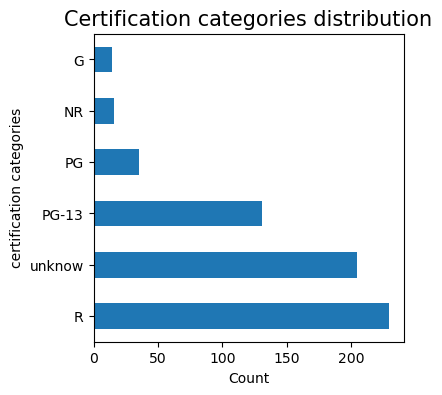

In [16]:
types = valid_finalcial['certification'].value_counts()
types.plot(kind='barh', figsize=(4,4))
plt.ylabel('certification categories', fontsize=10)

plt.xlabel('Count', fontsize=10)
plt.title('Certification categories distribution', fontsize=15)
plt.show()


### 3 - What is the average revenue per certification category?

In [17]:
aveg_renue = valid_finalcial.groupby('certification')['revenue'].mean()
aveg_renue

certification
G         1.237463e+08
NR        9.443087e+06
PG        1.123573e+08
PG-13     9.926299e+07
R         3.321119e+07
unknow    7.900668e+06
Name: revenue, dtype: float64

In [18]:
aveg_renue = valid_finalcial.groupby('certification')['revenue']

In [19]:
aveg_renue_sorted = valid_finalcial.groupby('certification')['revenue'].mean().reset_index().sort_values('revenue')

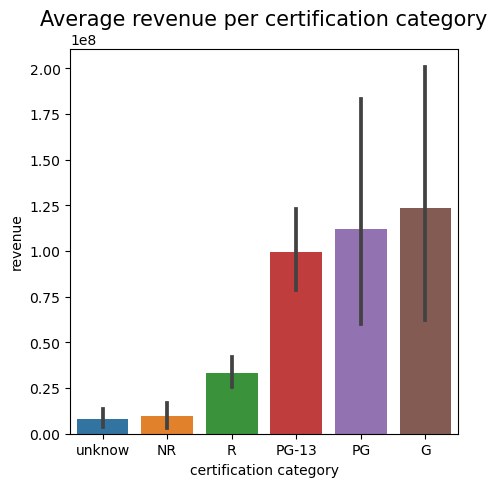

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(data=valid_finalcial, x='certification', y='revenue', order= aveg_renue_sorted['certification'])
plt.title('Average revenue per certification category', fontsize=15)
plt.xlabel('certification category', fontsize=10)
plt.ylabel('revenue', fontsize=10)
plt.show()

### 4 -  What is the average budget per certification category?

In [87]:
aveg_budget = valid_finalcial.groupby('certification')['budget'].mean()
aveg_budget

certification
G         4.085714e+07
NR        6.693756e+06
PG        4.497857e+07
PG-13     4.315388e+07
R         1.974674e+07
unknow    4.390238e+06
Name: budget, dtype: float64

In [88]:
aveg_budget_sorted = valid_finalcial.groupby('certification')['budget'].mean().reset_index().sort_values('budget')

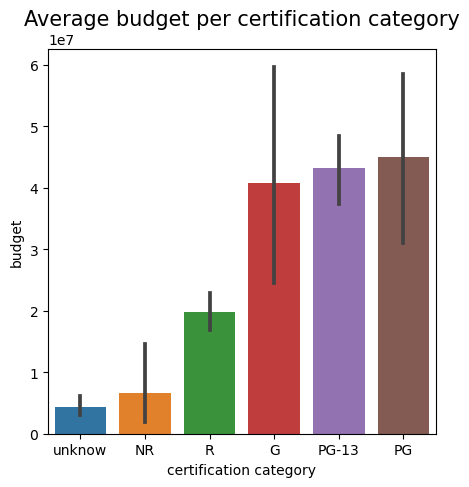

In [91]:
plt.figure(figsize=(5,5))
sns.barplot(data=valid_finalcial, x='certification', y='budget', order= aveg_budget_sorted['certification'])
plt.title('Average budget per certification category', fontsize=15)
plt.xlabel('certification category', fontsize=10)
plt.ylabel('budget', fontsize=10)
plt.show()